# Dive into NFL based Data and Analytics 

In [6]:
# By Tyran Javon Johnson

# This project demonstrates a few of the capabilities of python.Purpose is to 
# gain insight and a enhanced understanding of player and team performances in the NFL

# Libraries required to start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# All data collected on players is year by year, not by season. Each year a team plays 14-16 games, and 2-3 games in the following year
# First lets pull some data and start solving some questions. 
df = pd.read_csv("./FOOTBALL/ALL NFL pbp/Team Stats/nfl_offense_stats.csv")
#df.head()

In [9]:
# offensive NFL plays 2021
nfl = df

In [10]:
# Recieving stats
df3 = pd.read_csv("./FOOTBALL/ALL NFL pbp/player_stats/2021_player_stats/2021_player_receiving.csv")

In [11]:
# rushing stats
df4 = pd.read_csv("./FOOTBALL/ALL NFL pbp/player_stats/2021_player_stats/2021_player_rushing.csv")

In [12]:
#passing stats
df5 = pd.read_csv("./FOOTBALL/ALL NFL pbp/player_stats/2021_player_stats/2021_player_passing.csv")

In [13]:
# All stats in one
df_merge = pd.merge(df3, df4, on="player")

In [14]:
# Below is offensive stats for rushing, passing and recieving. Before merging, I made column in each df was unique minus the most left column ("player")
off_2021 = pd.merge(df_merge, df5, on="player")
off_2021.head()

,player,rec,rec_yds,rec_td,rec_20+,rec_40+,rec_lng,rec_1st,rec_1st%,rec_fum,...,pass_td,int,rate,pass_1st,pass_1st%,pass_20+,pass_40+,pass_long,sck,scky
0,Justin Jefferson,108,1616,10,27,5,56,75,0.694,1,...,0,0,106.2,2,0.667,1,0,24,0,0
1,Deebo Samuel,77,1405,6,23,9,83,51,0.662,4,...,1,0,133.3,1,0.500,1,0,24,0,0
2,Christian Kirk,77,982,5,16,4,50,44,0.571,0,...,0,0,118.8,1,1.000,1,0,33,0,0
3,Jakobi Meyers,83,866,2,12,0,39,42,0.506,1,...,0,0,118.8,1,0.500,1,0,30,0,0
4,Tyler Boyd,67,828,5,10,2,68,37,0.552,1,...,0,0,118.8,1,1.000,1,1,46,0,0


In [15]:
off_2021.columns

Index(['player', 'rec', 'rec_yds', 'rec_td', 'rec_20+', 'rec_40+', 'rec_lng',
       'rec_1st', 'rec_1st%', 'rec_fum', 'tgts', 'yd/rec', 'rush_yds',
       'rush_att', 'rush_td', 'rush_20+', 'Rush_40+', 'rush_lng', 'rus_1st',
       'rush_1st%', 'rush_fum', 'pass _yds', 'pass_yat', 'pass_att',
       'pass_cmp', 'cmp%', 'pass_td', 'int', 'rate', 'pass_1st', 'pass_1st%',
       'pass_20+', 'pass_40+', 'pass_long', 'sck', 'scky'],
      dtype='object')

In [16]:
# Concating the dfs results in me losing some data.
df_concat = pd.concat([df3, df4, df5])
df_concat.head()

,player,rec,rec_yds,rec_td,rec_20+,rec_40+,rec_lng,rec_1st,rec_1st%,rec_fum,...,pass_td,int,rate,pass_1st,pass_1st%,pass_20+,pass_40+,pass_long,sck,scky
0,Cooper Kupp,145.0,1947.0,16.0,30.0,9.0,59.0,89.0,0.614,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Justin Jefferson,108.0,1616.0,10.0,27.0,5.0,56.0,75.0,0.694,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Davante Adams,123.0,1553.0,11.0,19.0,4.0,59.0,84.0,0.683,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ja'Marr Chase,81.0,1455.0,13.0,22.0,8.0,82.0,56.0,0.691,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Deebo Samuel,77.0,1405.0,6.0,23.0,9.0,83.0,51.0,0.662,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# This is adding Yahoo default fantasy points per offensive stats minus any special teams points scored for offensive players.
# Fantasy points vary depending on league and scoring setting

off_2021 = off_2021.assign(fan_rush = round(off_2021["rush_yds"] / 8, 2))
off_2021 = off_2021.assign(fan_pass = round(off_2021["pass _yds"] / 20, 2))
off_2021 = off_2021.assign(fan_int = round(off_2021["int"] * -2, 2))
off_2021 = off_2021.assign(fan_pass_td = round(off_2021["pass_td"] * 5, 2))
off_2021 = off_2021.assign(fan_rush_td = round(off_2021["rush_td"] * 5, 2))
off_2021 = off_2021.assign(fan_rec_yds = round(off_2021["rec_yds"] / 8, 2))
off_2021 = off_2021.assign(fan_rec_td = round(off_2021["rec_td"] * 5, 2))
off_2021 = off_2021.assign(fan_rec = round(off_2021["rec"] * .5, 2))
off_2021 = off_2021.assign(fan_rush_fum = round(off_2021["rush_fum"] * -2, 2))
off_2021 = off_2021.assign(fan_rec_fum = round(off_2021["rec_fum"] * -2, 2))




In [18]:
# Total Fantasy points for offensive players during the 2021 season
off_2021["total_fp"] = off_2021[["fan_rush", "fan_pass", "fan_int", "fan_pass_td", "fan_rush_td", "fan_rec_yds", "fan_rec_td", "fan_rec", "fan_rush_fum", "fan_rec_fum"]].sum(axis=1)

In [19]:
off_2021.head()
# I want to find the average points scored for each player, but unfortunately games played is missing
# To fix this problem, I will extract this df and add more details to it using excel

,player,rec,rec_yds,rec_td,rec_20+,rec_40+,rec_lng,rec_1st,rec_1st%,rec_fum,...,fan_pass,fan_int,fan_pass_td,fan_rush_td,fan_rec_yds,fan_rec_td,fan_rec,fan_rush_fum,fan_rec_fum,total_fp
0,Justin Jefferson,108,1616,10,27,5,56,75,0.694,1,...,1.75,0,0,0,202.00,50,54.0,0,-2,307.50
1,Deebo Samuel,77,1405,6,23,9,83,51,0.662,4,...,1.20,0,5,40,175.62,30,38.5,0,-8,327.94
2,Christian Kirk,77,982,5,16,4,50,44,0.571,0,...,1.65,0,0,0,122.75,25,38.5,0,0,189.28
3,Jakobi Meyers,83,866,2,12,0,39,42,0.506,1,...,2.25,0,0,0,108.25,10,41.5,0,-2,161.12
4,Tyler Boyd,67,828,5,10,2,68,37,0.552,1,...,2.30,0,0,0,103.50,25,33.5,0,-2,165.05


In [20]:
# Saving off_2021 as an csv file

off_2021.to_csv('off_2021.csv', index=False)
off_2021.to_excel('offf_2021.xlsx', index=False)




In [21]:
off_2021.columns

Index(['player', 'rec', 'rec_yds', 'rec_td', 'rec_20+', 'rec_40+', 'rec_lng',
       'rec_1st', 'rec_1st%', 'rec_fum', 'tgts', 'yd/rec', 'rush_yds',
       'rush_att', 'rush_td', 'rush_20+', 'Rush_40+', 'rush_lng', 'rus_1st',
       'rush_1st%', 'rush_fum', 'pass _yds', 'pass_yat', 'pass_att',
       'pass_cmp', 'cmp%', 'pass_td', 'int', 'rate', 'pass_1st', 'pass_1st%',
       'pass_20+', 'pass_40+', 'pass_long', 'sck', 'scky', 'fan_rush',
       'fan_pass', 'fan_int', 'fan_pass_td', 'fan_rush_td', 'fan_rec_yds',
       'fan_rec_td', 'fan_rec', 'fan_rush_fum', 'fan_rec_fum', 'total_fp'],
      dtype='object')

In [23]:
# Receiving Average Metrics
off_2021.iloc[:,1:10].apply(np.mean)

rec          41.466667
rec_yds     536.466667
rec_td        2.733333
rec_20+       7.466667
rec_40+       1.800000
rec_lng      37.933333
rec_1st      23.466667
rec_1st%      0.489533
rec_fum       0.600000
dtype: float64

In [24]:
# theres a ton of columns in the df. Here is a way to see all the column names
nfl.head().T

,0,1,2,3,4
player,Garrett Bradbury,C.J. Goodwin,Adam Prentice,Adam Prentice,Andy Janovich
year,2022,2022,2022,2022,2022
position,C,CB,FB,FB,FB
team,MIN,DAL,NOR,NOR,CLE
pass_cmp,0,0,0,0,0
...,...,...,...,...,...
Humidity,60,45,45,45,60
wind_speed,9,0,0,0,12
vegas_line,-13.0,-3.0,-6.5,-3.5,-2.0
vegas_favorite,GNB,DAL,NOR,NOR,PIT


In [25]:
# Average for a few metrics
nfl.iloc[:,47:53].apply(np.mean)

rush_broken_tackles     0.145096
rec_air_yds            21.977875
rec_yac                 9.532569
rec_drops               0.133731
offense                32.708857
off_pct                48.993691
dtype: float64

In [26]:
# Max for the above metrics
nfl.iloc[:,47:53].apply(np.max)

rush_broken_tackles     11.0
rec_air_yds            320.6
rec_yac                153.0
rec_drops                6.0
offense                100.0
off_pct                100.0
dtype: float64

# Task 1: Find the average rec yac of only pass catchers. Mininum of at least one target.

In [27]:
nfl_max_yac = nfl.iloc[:,49:50].apply(np.max)

In [28]:
# Im all over the place. This is the max rec yac.
nfl_max_yac = nfl.iloc[:,49:50].apply(np.max)
print(nfl_max_yac)

rec_yac    153
dtype: int64


In [29]:
mean_yac = (nfl['rec_yac'].loc[nfl['rec_yac'] != 0]).mean()
print(mean_yac)

17.35904449307075


# Task 2: List QBs that had 300+ passing yards games in a game

In [30]:
# First I will try to set a value of 300+ passing yards.
nfl_qb_top_tier = nfl['pass_yds'] >=300
nfl[nfl_qb_top_tier]

,player,year,position,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_score,ot,roof,surface,temperature,Humidity,wind_speed,vegas_line,vegas_favorite,over_under
46,Joe Burrow,2022,QB,CIN,30,39,446,4,0,4,...,34,False,outdoors,fieldturf,33,81,13,-4.0,KAN,51.5
47,Tom Brady,2022,QB,TAM,34,50,410,3,1,1,...,24,False,outdoors,fieldturf,57,82,9,-13.5,TAM,45.5
48,Patrick Mahomes,2022,QB,KAN,30,39,404,5,1,3,...,42,False,outdoors,grass,30,78,8,-12.5,KAN,46.5
49,Justin Herbert,2022,QB,LAC,34,64,383,3,1,3,...,35,True,dome,grass,72,45,0,-3.0,LAC,49.0
50,Patrick Mahomes,2022,QB,KAN,33,44,378,3,0,2,...,42,True,outdoors,grass,35,54,6,-2.0,KAN,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14292,Dak Prescott,2019,QB,DAL,23,33,303,4,0,3,...,47,False,retractable roof (closed),fieldturf,72,45,0,-12.5,DAL,47.5
14293,Joe Flacco,2019,QB,DEN,22,38,303,3,1,0,...,24,False,outdoors,grass,87,11,14,-2.5,DEN,37.0
14294,Daniel Jones,2019,QB,NYG,28,47,301,1,1,4,...,17,False,outdoors,fieldturf,42,69,5,-4.0,PHI,44.0
14295,Jameis Winston,2019,QB,TAM,21,43,301,2,2,3,...,27,False,outdoors,grass,59,67,3,-2.0,TEN,45.5


In [31]:
# Here is a second way to get the same table which shows all passing yards of 300 and greater.
# nfl.query('pass_yds >=300')

In [32]:
nfl_qb = nfl[nfl_qb_top_tier]

In [33]:
# Now I will try to count exactly how many times each player had over 300 passing yards in a game
nfl_qb = nfl_qb.sort_values(by="pass_yds", ascending=False)

In [34]:
new_qb_df = nfl_qb.sort_values(by="pass_yds", ascending=False)

In [35]:
results = new_qb_df['player'].value_counts()

In [36]:
# The above shows leaders for the most 300 more passing yards in a game from 2019 to 2022.

In [37]:
# Testing a function 
def my_first_function(a, b, c):
    if a > b:
        return("LEGENDARY")
    if b > c:
        return("ELITE")
    return("GOOD")
# The result below are the top 5 QBs total 300+ passing yard games over 2021-2022 season.
results.head()

Patrick Mahomes    25
Tom Brady          23
Matt Ryan          20
Josh Allen         17
Justin Herbert     17
Name: player, dtype: int64

<AxesSubplot:>

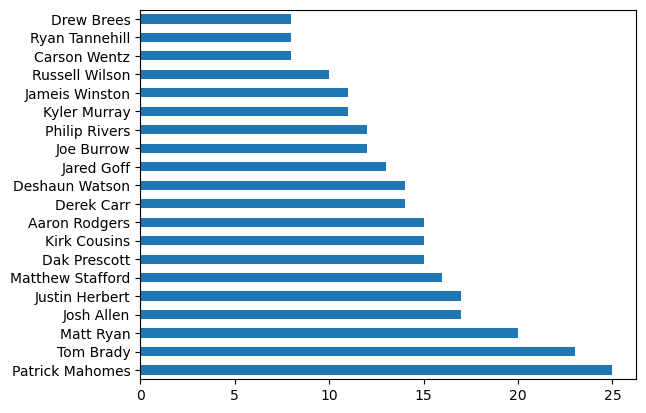

In [38]:
# heres a bar graph for players with the most 300 or more yards thrown in a game since 2019.
new_qb_df['player'].value_counts()[:20].plot(kind='barh')

In [39]:
# All the occurrences a QB has thrown for 3 tds or more in a game.
# if you want to just see the names, put in 'player' at the end. 
nfl.loc[nfl['pass_td'] >= 3,]

,player,year,position,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_score,ot,roof,surface,temperature,Humidity,wind_speed,vegas_line,vegas_favorite,over_under
46,Joe Burrow,2022,QB,CIN,30,39,446,4,0,4,...,34,False,outdoors,fieldturf,33,81,13,-4.0,KAN,51.5
47,Tom Brady,2022,QB,TAM,34,50,410,3,1,1,...,24,False,outdoors,fieldturf,57,82,9,-13.5,TAM,45.5
48,Patrick Mahomes,2022,QB,KAN,30,39,404,5,1,3,...,42,False,outdoors,grass,30,78,8,-12.5,KAN,46.5
49,Justin Herbert,2022,QB,LAC,34,64,383,3,1,3,...,35,True,dome,grass,72,45,0,-3.0,LAC,49.0
50,Patrick Mahomes,2022,QB,KAN,33,44,378,3,0,2,...,42,True,outdoors,grass,35,54,6,-2.0,KAN,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,Lamar Jackson,2019,QB,BAL,15,20,169,5,0,2,...,6,False,outdoors,grass,62,64,5,-3.5,BAL,47.0
14597,Brian Hoyer,2019,QB,IND,17,26,168,3,1,4,...,26,False,outdoors,grass,48,47,12,-1.0,PIT,39.5
14612,Carson Wentz,2019,QB,PHI,16,27,160,3,0,0,...,27,False,outdoors,grass,60,62,3,-3.5,GNB,46.0
14633,Jacoby Brissett,2019,QB,IND,17,28,146,3,1,3,...,17,False,outdoors,grass,93,45,1,-3.0,TEN,43.5


# Task 3: QB data with TDS > Turnovers

In [40]:
# This is what I got so far. I will need to work on cleaning up my results to show only QB stats
nfl[nfl['position'].isin(['QB'])]
qb_data = nfl[nfl['position'].isin(['QB'])]
qb_data.query('pass_td > fumbles_lost + pass_int')

,player,year,position,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_score,ot,roof,surface,temperature,Humidity,wind_speed,vegas_line,vegas_favorite,over_under
46,Joe Burrow,2022,QB,CIN,30,39,446,4,0,4,...,34,False,outdoors,fieldturf,33,81,13,-4.0,KAN,51.5
47,Tom Brady,2022,QB,TAM,34,50,410,3,1,1,...,24,False,outdoors,fieldturf,57,82,9,-13.5,TAM,45.5
48,Patrick Mahomes,2022,QB,KAN,30,39,404,5,1,3,...,42,False,outdoors,grass,30,78,8,-12.5,KAN,46.5
49,Justin Herbert,2022,QB,LAC,34,64,383,3,1,3,...,35,True,dome,grass,72,45,0,-3.0,LAC,49.0
50,Patrick Mahomes,2022,QB,KAN,33,44,378,3,0,2,...,42,True,outdoors,grass,35,54,6,-2.0,KAN,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688,Matt Schaub,2019,QB,ATL,6,6,65,1,0,0,...,10,False,retractable roof (open),fieldturf,72,45,0,-3.0,LAR,54.5
14691,Matt Schaub,2019,QB,ATL,5,9,55,1,0,0,...,22,False,retractable roof (closed),fieldturf,72,45,0,-3.5,ATL,51.5
14692,Robert Griffin III,2019,QB,BAL,6,6,55,1,0,0,...,10,False,outdoors,grass,91,56,8,-7.0,BAL,41.0
14697,Mike Glennon,2019,QB,LVR,2,3,36,1,0,0,...,42,False,outdoors,grass,55,74,6,-5.5,GNB,48.0


# Task 4: Filter out the data to only see offensive stats using PBP Data

In [41]:
# This syntax shows a dataframse of the primary offensive skill positions
nfl[nfl['position'].isin(['QB', 'WR', 'RB', 'HB', 'FB', 'TE'])]
offensive_skill = nfl[nfl['position'].isin(['QB', 'WR', 'RB', 'HB', 'FB', 'TE'])]

In [42]:
# This will only show QB data
nfl[nfl['position'].isin(['QB'])]
qb_data = nfl[nfl['position'].isin(['QB'])]

In [43]:
# WRs only
nfl[nfl['position'].isin(['WR'])]
wr_data = nfl[nfl['position'].isin(['WR'])]

In [44]:
# RBs only
nfl[nfl['position'].isin(['RB','HB'])]
rb_data = nfl[nfl['position'].isin(['RB','HB'])]

In [45]:
# TEs only
nfl[nfl['position'].isin(['TE'])]
te_data = nfl[nfl['position'].isin(['TE'])]

# Task 5: Further evaluate wr_data dataframe

In [46]:
# Top receivers in the league in yards.

new_wr_data = wr_data[wr_data['year'].isin([2022, 2021])]
wr_stats = new_wr_data.groupby(new_wr_data['player']).aggregate({'rec': 'sum', 'rec_yds': 'sum', 'rec_td': 'sum', 'rec_long': 'max', 'rush_td': 'sum', 'rec_yac': 'sum', 'targets': 'sum'})
top_wr = wr_stats.sort_values(by='rec_yds', ascending=False).iloc[0:50]


In [47]:
# Top 5 WR in the NFL
rec_yac = wr_data.groupby(wr_data['player']).aggregate({'rec_yac': 'sum'})
rec_yac.sort_values(by=['rec_yac'],ascending = False).head(5)

,rec_yac
player,
Cooper Kupp,2122
Deebo Samuel,1841
Davante Adams,1786
Chris Godwin,1547
Tyreek Hill,1516


In [48]:
# Yards per reception shows how many yards a receiver gain by every catch. 
wr_stats['yards_per_rec'] = wr_stats['rec_yds'] / wr_stats['rec']

# YAC Percentage. Percent of total yards that come after catch. 
wr_stats['yac_pct'] = wr_stats['rec_yac'] / wr_stats['rec_yds'] * 100

# Catch percentage will represent the percent of catches a playes gets. These numbers can vary
wr_stats['catch_p'] = wr_stats['rec'] / wr_stats['targets'] * 100
wr1 = wr_stats.round(decimals = 2)

In [49]:
wr1.sort_values(by='rec_yds', ascending=False).head(10)

,rec,rec_yds,rec_td,rec_long,rush_td,rec_yac,targets,yards_per_rec,yac_pct,catch_p
player,,,,,,,,,,
Cooper Kupp,182,2503,22,70,0,1059,242,13.75,42.31,75.21
Tyreek Hill,158,1879,12,75,0,765,218,11.89,40.71,72.48
Ja'Marr Chase,106,1823,14,82,0,822,163,17.20,45.09,65.03
Davante Adams,156,1822,14,59,0,696,211,11.68,38.20,73.93
Justin Jefferson,117,1749,10,56,0,531,179,14.95,30.36,65.36
Stefon Diggs,136,1679,12,61,0,449,213,12.35,26.74,63.85
Deebo Samuel,87,1559,7,83,9,922,135,17.92,59.14,64.44
Mike Evans,105,1521,18,55,0,380,166,14.49,24.98,63.25
Chris Godwin,119,1468,8,52,1,724,166,12.34,49.32,71.69


In [50]:
# Here is the percentage of yards after catch for the top 25 wrs. 
top_wr['rec_yac'] / top_wr['rec_yds'] * 100
# Hey look at Jarvis Landry sitting at 49.8% of yards after the catch. I cant wait to see what he can do for the BLACK & GOLD!!

player
Cooper Kupp            42.309229
Tyreek Hill            40.713145
Ja'Marr Chase          45.090510
Davante Adams          38.199780
Justin Jefferson       30.360206
Stefon Diggs           26.742108
Deebo Samuel           59.140475
Mike Evans             24.983563
Chris Godwin           49.318801
Diontae Johnson        40.838068
Tee Higgins            30.285714
Tyler Lockett          25.152905
D.J. Moore             34.658188
Mike Williams          34.529506
Marquise Brown         36.385542
A.J. Brown             25.542169
Brandin Cooks          31.005819
Michael Pittman Jr.    34.666667
Terry McLaurin         28.167808
CeeDee Lamb            39.193825
Darnell Mooney         36.062718
Keenan Allen           29.613357
Hunter Renfrow         45.000000
D.K. Metcalf           32.749077
Chase Claypool         30.526316
Christian Kirk         23.523717
Jaylen Waddle          43.251232
Marvin Jones           16.798419
Van Jefferson          30.300000
Gabriel Davis          21.261445
DeV

In [51]:
import math

# I'm going to attempt to calculate percentiles of yards for WRs. 

def my_percentile(top_wr, percentile):
    n = len(wr1.rec_yds)
    p = n * percentile/100
    if p.is_integer():
        return sorted(wr1.rec_yds)[int(p)]
    else:
        return sorted(wr1.rec_yds)[int(math.ceil(p)) - 1]

dist = np.random.randn(10)
index = [5, 25, 50, 75, 95]
perc_func = [my_percentile(dist, i) for i in index]
print(perc_func)
# Key: There is a huge jump in percentile from WRs in the 75 and 95 percent. 

[0, 21, 148, 507, 1245]


In [52]:
# Who leads in YAC from 2019-2022?
wr_data.sort_values(by=['rec_yac', 'rec', 'rec_yds'])

more_results = wr_data.groupby('player')['rec_yac'].sum()
print(more_results)

player
A.J. Brown        1214
A.J. Green         267
Aaron Fuller         0
Adam Humphries     320
Adam Thielen       626
                  ... 
Vyncint Smith      106
Will Fuller        541
Willie Snead       349
Zach Pascal        600
Zay Jones          314
Name: rec_yac, Length: 367, dtype: int64


In [53]:
# Just for reference
r = nfl.columns.tolist()
print(r)

['player', 'year', 'position', 'team', 'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int', 'pass_sacked', 'pass_sacked_yds', 'pass_long', 'pass_rating', 'rush_att', 'rush_yds', 'rush_td', 'rush_long', 'targets', 'rec', 'rec_yds', 'rec_td', 'rec_long', 'fumbles_lost', 'rush_scrambles', 'designed_rush_att', 'comb_pass_rush_play', 'comb_pass_play', 'comb_rush_play', 'opponent_abbrev', 'two_point_conv', 'total_ret_td', 'offensive_fumble_recovery_td', 'pass_yds_bonus', 'rush_yds_bonus', 'rec_yds_bonus', 'Total_DKP', 'Off_DKP', 'total_fdp', 'off_fdp', 'total_sdp', 'off_sdp', 'pass_target_yds', 'pass_poor_throws', 'pass_blitzed', 'pass_hurried', 'rush_yds_before_contact', 'rush_yac', 'rush_broken_tackles', 'rec_air_yds', 'rec_yac', 'rec_drops', 'offense', 'off_pct', 'vis_team', 'home_team', 'vis_score', 'home_score', 'ot', 'roof', 'surface', 'temperature', 'Humidity', 'wind_speed', 'vegas_line', 'vegas_favorite', 'over_under']


# Task 6: Further analyze rb data

In [54]:
rb_data[["player", "year", "position", "team", "rush_yds", "rush_att", "rush_td", "rec_td", "targets", "rec_yds"]].head()

,player,year,position,team,rush_yds,rush_att,rush_td,rec_td,targets,rec_yds
151,Joe Mixon,2022,RB,CIN,72,15,0,0,6,1
152,Aaron Jones,2022,RB,GNB,76,8,0,0,6,30
153,Aaron Jones,2022,RB,GNB,41,12,0,0,10,129
154,AJ Dillon,2022,RB,GNB,63,14,2,0,3,20
155,AJ Dillon,2022,RB,GNB,63,14,0,0,1,4


In [63]:
# A look into the top 10 rushers in 2021
rush_rank = df4.sort_values(by='rush_yds', ascending=False)
#These are the top 10 rushers for 2021
rush_rank.iloc[0:10]

,player,rush_yds,rush_att,rush_td,rush_20+,Rush_40+,rush_lng,rus_1st,rush_1st%,rush_fum,ypc
0,Jonathan Taylor,1811,332,18,14,5,83,107,3.103,3,5.454819
1,Nick Chubb,1259,228,8,12,2,70,61,3.738,2,5.521930
2,Joe Mixon,1205,292,13,6,0,32,60,4.867,1,4.126712
3,Najee Harris,1200,307,7,6,0,37,62,4.952,0,3.908795
4,Dalvin Cook,1159,249,6,9,1,66,57,4.368,3,4.654618
5,Antonio Gibson,1037,258,7,4,0,27,65,3.969,5,4.019380
6,Ezekiel Elliott,1002,237,10,3,1,47,55,4.309,1,4.227848
7,Elijah Mitchell,963,207,5,6,0,39,47,4.404,0,4.652174
8,Derrick Henry,937,219,10,3,2,76,49,4.469,1,4.278539
9,Damien Harris,929,202,15,8,1,64,55,3.673,2,4.599010


In [65]:
# YPC for the top 50
ypc = rb_data['rush_yds'] / rb_data['rush_att']
rb_data["ypc"] = ypc
rb_data = rb_data.round(2)
rb_data.head()

,player,year,position,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,ot,roof,surface,temperature,Humidity,wind_speed,vegas_line,vegas_favorite,over_under,ypc
151,Joe Mixon,2022,RB,CIN,1,1,6,1,0,0,...,False,dome,matrixturf,72,45,0,-4.0,LAR,48.5,4.80
152,Aaron Jones,2022,RB,GNB,0,0,0,0,0,0,...,False,outdoors,grass,11,60,9,-13.0,GNB,42.5,9.50
153,Aaron Jones,2022,RB,GNB,0,0,0,0,0,0,...,False,outdoors,grass,15,53,12,-5.5,GNB,47.0,3.42
154,AJ Dillon,2022,RB,GNB,0,0,0,0,0,0,...,False,outdoors,grass,11,60,9,-13.0,GNB,42.5,4.50
155,AJ Dillon,2022,RB,GNB,0,0,0,0,0,0,...,False,dome,fieldturf,72,45,0,-3.0,GNB,44.5,4.50


In [66]:
# Top 10 YPC (yards per carry) leaders 2021-2022
df4['ypc'] = df4['rush_yds'] / df4['rush_att']
# Sort the DataFrame by 'ypc' in descending order and select the top 10
top_10 = df4.sort_values(by='ypc', ascending=False).head(10)

# Print the 'player' and 'ypc' columns for these top 10 players
print(top_10[['player', 'ypc']])

               player        ypc
303       Dawson Knox        inf
206        C.J. Moore  28.000000
215       Greg Dortch  24.000000
174      Scott Miller  21.500000
238         John Ross  16.000000
123       Jamal Agnew  15.857143
201  Emmanuel Sanders  15.500000
156  D'Wayne Eskridge  14.750000
244     Cyril Grayson  14.000000
245     Sean Chandler  14.000000


In [67]:
# Although the above is true, Im only interested in seeing players who got a min of 100 carries
df4_filtered = df4[df4['rush_att'] >= 100]
# Sort the DataFrame by 'ypc' in descending order and select the top 10
top_10_ = df4_filtered.sort_values(by='ypc', ascending=False).head(10)
# Printing filtered 10 leading rushers with a minimum of 100 carries, not excluding other positions 
print(top_10_[['player', 'ypc']])

              player       ypc
28     Rashaad Penny  6.294118
25        Josh Allen  6.254098
24     Lamar Jackson  5.766917
22       Jalen Hurts  5.640288
29      Tony Pollard  5.530769
1         Nick Chubb  5.521930
26     Miles Sanders  5.503650
0    Jonathan Taylor  5.454819
44  D'Ernest Johnson  5.340000
40     Chase Edmonds  5.103448


# Task 7: Futher analyze TE data

In [68]:
# TE's only
te_data

,player,year,position,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_score,ot,roof,surface,temperature,Humidity,wind_speed,vegas_line,vegas_favorite,over_under
401,Travis Kelce,2022,TE,KAN,1,1,2,1,0,0,...,42,False,outdoors,grass,30,78,8,-12.5,KAN,46.5
402,Adam Shaheen,2022,TE,MIA,0,0,0,0,0,0,...,34,False,outdoors,grass,43,93,13,-3.0,TEN,40.0
403,Adam Shaheen,2022,TE,MIA,0,0,0,0,0,0,...,33,False,outdoors,grass,75,79,8,-6.0,NWE,40.0
404,Adam Trautman,2022,TE,NOR,0,0,0,0,0,0,...,18,False,dome,sportturf,72,45,0,-6.5,NOR,37.5
405,Adam Trautman,2022,TE,NOR,0,0,0,0,0,0,...,20,False,retractable roof (closed),fieldturf,72,45,0,-3.5,NOR,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,Zach Ertz,2019,TE,PHI,0,0,0,0,0,0,...,17,False,outdoors,grass,47,46,7,-2.0,DAL,47.0
17558,Zach Gentry,2019,TE,PIT,0,0,0,0,0,0,...,24,False,outdoors,grass,79,36,3,-6.0,SFO,44.5
17559,Zach Gentry,2019,TE,PIT,0,0,0,0,0,0,...,27,False,outdoors,grass,76,72,1,-3.5,PIT,45.5
17560,Zach Gentry,2019,TE,PIT,0,0,0,0,0,0,...,17,False,outdoors,grass,71,61,9,-6.0,LAC,42.5


In [69]:
# The only TEs to produce over 2000 yards over the last 3 full seasons. 
te_stats = te_data.groupby(te_data['player']).aggregate({'rec': 'sum', 'rec_yds': 'sum', 'rec_td': 'sum', 'rec_long': 'max', 'rush_td': 'sum', 'rec_yac': 'sum', 'targets': 'sum'})
top_te = te_stats[(te_stats['rec_yds'] > 2000)]
print(top_te)

                rec  rec_yds  rec_td  rec_long  rush_td  rec_yac  targets
player                                                                   
Dallas Goedert  173     2126      12        45        0      974      248
Darren Waller   259     3082      14        75        0     1400      367
George Kittle   215     2740      14        61        0     1417      284
Mark Andrews    241     3022      26        51        0      963      363
Mike Gesicki    177     2053      13        70        0      550      286
Travis Kelce    361     4593      34        69        2     1899      498
Zach Ertz       203     2079      12        47        0      721      327


# Task 8: Dive into factors that may determine win/lose probability.

In [70]:
# Lets first try to define wins and losses. Since the data takes in every play, there is duplicate data for scores that exist.
# I will create a new column to the dataframe outlining which team (visitor or home) won. 


conditions = [nfl['vis_score'] > nfl['home_score'],
              nfl['vis_score'] < nfl['home_score']]

choices = ['visitor', 'home']

nfl['winning_team'] = np.select(conditions, choices, default='tie')
nfl.winning_team

0           home
1        visitor
2           home
3        visitor
4           home
          ...   
19968       home
19969    visitor
19970    visitor
19971    visitor
19972       home
Name: winning_team, Length: 19973, dtype: object

In [71]:
# Lets get rid of duplicate games since the dataframe is factoring in players from the same team.
# Below are 5 different variables that will remain constant for duplicates.
wins_losses_data = nfl[['year', 'vis_team', 'home_team', 'home_score', 'vis_score', 'winning_team']]
wins_loss_data = wins_losses_data.drop_duplicates()
wins_loss_data
# The data below shows all wins in regular season and playoff games from 2019 to 2022. 

,year,vis_team,home_team,home_score,vis_score,winning_team
0,2022,MIN,GNB,37,10,home
1,2022,SFO,DAL,17,23,visitor
2,2022,CAR,NOR,18,10,home
3,2022,NOR,ATL,20,30,visitor
4,2022,CLE,PIT,26,14,home
...,...,...,...,...,...,...
14552,2019,CHI,LAR,17,7,home
14555,2019,NYJ,PHI,31,6,home
14563,2019,PIT,NYJ,16,10,home
14599,2019,WAS,MIA,16,17,visitor


In [91]:
# This is all the years I have on wins and losses
wins_losses_data['year'].unique()

array([2022, 2021, 2020, 2019], dtype=int64)

In [72]:
# The probability the home team won a game
import seaborn as sns
%matplotlib inline

plt_wins = wins_loss_data['winning_team'].value_counts().rename_axis('the_values').reset_index(name='counts')
plt_wins

,the_values,counts
0,home,418
1,visitor,399
2,tie,3


In [73]:
# Here is the wins, losses, and ties in percentage
(wins_loss_data['winning_team'].value_counts()/wins_loss_data['winning_team'].count())*100

home       50.975610
visitor    48.658537
tie         0.365854
Name: winning_team, dtype: float64

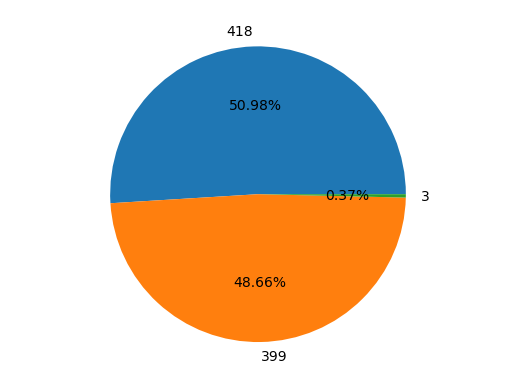

In [74]:
fig = plt.figure()
your_labels = plt_wins.the_values
your_values = plt_wins.counts
ax = fig.add_subplot(111)
ax.axis('equal')
ax.pie(your_values, labels = your_values, autopct='%1.2f%%')
plt.show()

In [75]:
# Derive a win/loss indicator
nfl['win'] = (nfl['winning_team'] == nfl['team'])

In [76]:
# Next I want to specifically look at passers to derive efficiency with winning
passing_columns = ['pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int', 'pass_rating', 'win']
passing_data = nfl[passing_columns]
# Filtering out rows where pass attempts are zero to avoid skewing the analysis
passing_data = passing_data[passing_data['pass_att'] > 0]

In [78]:
# average passing statistics for winning scenarios
passing_win_rate = passing_data.groupby('win').mean()
passing_win_rate

,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_rating
win,,,,,,
False,18.325871,28.419403,204.355721,1.308955,0.645771,89.695721


In [79]:
# Applying the provided logic to determine the winning team
conditions = [nfl['vis_score'] > nfl['home_score'],
              nfl['vis_score'] < nfl['home_score']]
choices = ['visitor', 'home']
nfl['winning_team'] = np.select(conditions, choices, default='tie')

# Adjusting the win/loss indicator
# A team wins if it is the home team and the winning_team is 'home', or if it is the visitor team and the winning_team is 'visitor'
nfl['win'] = ((nfl['team'] == nfl['vis_team']) & (nfl['winning_team'] == 'visitor')) | \
                  ((nfl['team'] == nfl['home_team']) & (nfl['winning_team'] == 'home'))

# Rechecking the average passing statistics for winning and losing scenarios
passing_data = nfl[passing_columns]
passing_data = passing_data[passing_data['pass_att'] > 0]
passing_win_rate = passing_data.groupby('win').mean()

passing_win_rate


,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_rating
win,,,,,,
False,18.461463,30.012683,197.492683,1.012683,0.882927,78.324488
True,18.184772,26.761421,211.497462,1.617259,0.398985,101.528731


<Figure size 1000x600 with 0 Axes>

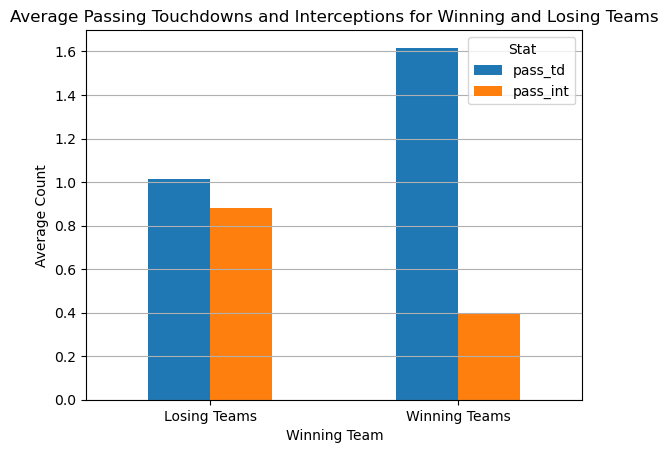

In [80]:
# Setting up the data for the bar graph
bar_data = passing_win_rate[['pass_td', 'pass_int']]

# Plotting
plt.figure(figsize=(10, 6))
bar_data.plot(kind='bar', rot=0)
plt.title('Average Passing Touchdowns and Interceptions for Winning and Losing Teams')
plt.xlabel('Winning Team')
plt.ylabel('Average Count')
plt.xticks([0, 1], ['Losing Teams', 'Winning Teams'])
plt.legend(title='Stat')
plt.grid(axis='y')

plt.show()

<Figure size 1000x600 with 0 Axes>

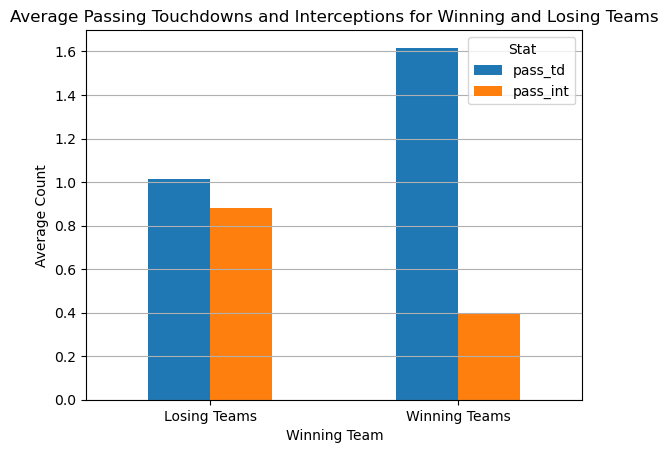

In [81]:
# Setting up the data for the bar graph
bar_data = passing_win_rate[['pass_td', 'pass_int']]

# Plotting
plt.figure(figsize=(10, 6))
bar_data.plot(kind='bar', rot=0)
plt.title('Average Passing Touchdowns and Interceptions for Winning and Losing Teams')
plt.xlabel('Winning Team')
plt.ylabel('Average Count')
plt.xticks([0, 1], ['Losing Teams', 'Winning Teams'])
plt.legend(title='Stat')
plt.grid(axis='y')

plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_18016\2005130408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data['pass_rating_binned'] = pd.cut(scatter_data['pass_rating'], bins=10)


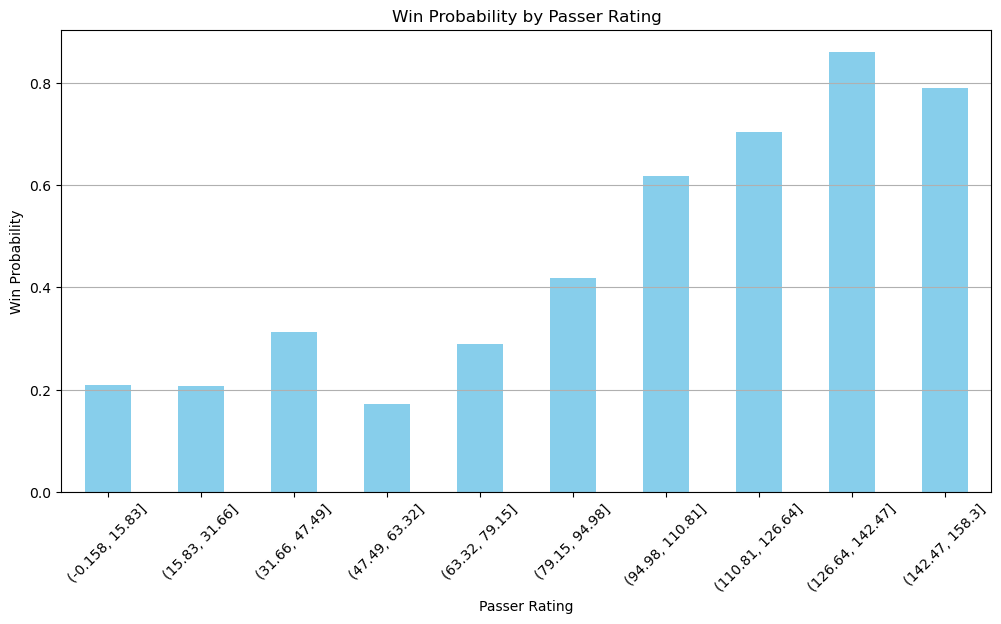

In [82]:
# Preparing data for scatter plot - passer rating vs win probability
scatter_data = passing_data[['pass_rating', 'win']]

# Binning passer ratings for better visualization
scatter_data['pass_rating_binned'] = pd.cut(scatter_data['pass_rating'], bins=10)

# Calculating win probability for each bin
win_probability = scatter_data.groupby('pass_rating_binned')['win'].mean()

# Plotting
plt.figure(figsize=(12, 6))
win_probability.plot(kind='bar', color='skyblue', rot=45)
plt.title('Win Probability by Passer Rating')
plt.xlabel('Passer Rating')
plt.ylabel('Win Probability')
plt.grid(axis='y')

plt.show()


# # Aanalyzing DATA on NFL plays

In [92]:
plays = pd.read_csv("./FOOTBALL/ALL NFL pbp/plays.csv")

In [98]:
# Making a year column from the game id info.

plays['year'] = plays['game_id'].astype(str).str[:4]
plays.head(3)

,game_id,play_id,home_id,away_id,play_description,quarter,down,yards_togo,possession_team,special_teams_play_type,...,penalty_jersey_numbers,penalty_yards,preSnapHomeScore,presnap_visitor_score,pass_result,kick_length,kick_return_yardage,play_result,absolute_yardline_number,year
0,2021010315,42,SF,SEA,M.Wishnowsky kicks 65 yards from SF 35 to end ...,1,0,0,SF,Kickoff,...,NaN,NaN,0,0,NaN,75.0,NaN,40,45,2021
1,2021010315,175,SF,SEA,"(13:07) M.Dickson punts 47 yards to SF 20, Cen...",1,4,12,SEA,Punt,...,NaN,NaN,0,0,NaN,47.0,5.0,42,77,2021
2,2021010315,283,SF,SEA,"(10:58) M.Wishnowsky punts 49 yards to SEA 17,...",1,4,1,SF,Punt,...,NaN,NaN,0,0,NaN,49.0,NaN,49,44,2021


In [99]:
# Number of times from 2019-2020 that an extra point kicked was missed
plays_19_20 = plays[plays['year'].isin(['2019', '2020'])]

plays_19_20['special_teams_result'].value_counts()


Kick Attempt Good           3466
Touchback                   3337
Return                      3310
Fair Catch                  1026
Downed                       517
Out of Bounds                416
Kick Attempt No Good         389
Muffed                       128
Non-Special Teams Result      64
Blocked Kick Attempt          46
Blocked Punt                  23
Kickoff Team Recovery         11
Name: special_teams_result, dtype: int64

In [100]:
# of the total kicks missed, how many were for extra point?

extra_point = plays_19_20[plays_19_20['special_teams_play_type'].isin(['Extra Point'])]
(extra_point['special_teams_result'].value_counts()/extra_point['special_teams_result'].count())*100


Kick Attempt Good           92.921551
Kick Attempt No Good         5.816050
Blocked Kick Attempt         0.901713
Non-Special Teams Result     0.360685
Name: special_teams_result, dtype: float64

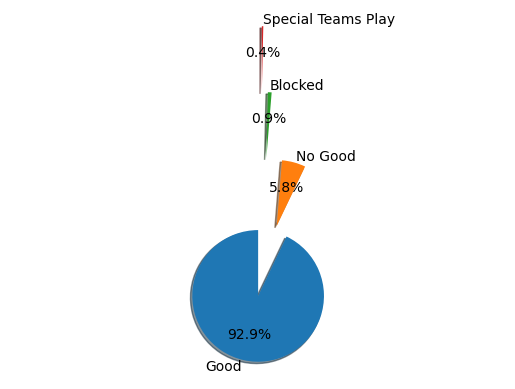

In [101]:
# Heres a pie chart showing the extra point kick success rate

labels = 'Good', 'No Good', 'Blocked', 'Special Teams Play'
sizes = [92.92, 5.82, 0.92, 0.36]
explode = (0.1, 1, 2, 3)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [102]:
# I feel that 2021 season experienced higher than average made extra point kicks. Let check it out. 
plays_2021 = plays[plays['year'].isin(['2021'])]
extra_point_2021 = plays_2021[plays_2021['special_teams_play_type'].isin(['Extra Point'])]
(extra_point_2021['special_teams_result'].value_counts()/extra_point_2021['special_teams_result'].count())*100
# The above findings shows there were no blocked extra point field goal attempts in 2021.
# It appears the rate of missed extra point attempts was about the same from 2019-2020 compared to 2021. 


Kick Attempt Good       94.117647
Kick Attempt No Good     5.882353
Name: special_teams_result, dtype: float64

# Analyzing NFL play-by-play data

In [114]:
# 2021 pbp data only shows plays of teams for the year of 2021. There are one or possibly 2 games missing for each team that were played in Janaury 2021
#  (relevant_plays['yard_gained'] >= 5)
pbp_data = pd.read_csv("./FOOTBALL/ALL NFL pbp/pbp-2021.csv")

C:\Users\Owner\AppData\Local\Temp\ipykernel_18016\1628489439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_plays['yard_gained'] = pd.to_numeric(relevant_plays['yard_gained'], errors='coerce')
C:\Users\Owner\AppData\Local\Temp\ipykernel_18016\1628489439.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_plays['yard_gained'] = pd.to_numeric(relevant_plays['yard_gained'], errors='coerce')
C:\Users\Owner\AppData\Local\Temp\ipykernel_18016\1628489439.py:10: SettingWithCopyWarning: 
A val

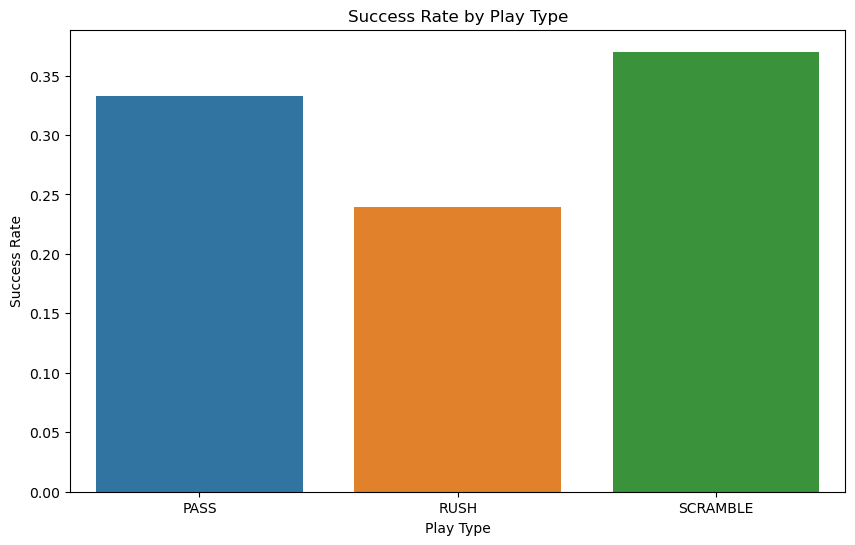

In [133]:
##Success Rate by play type

relevant_plays['yard_gained'] = pd.to_numeric(relevant_plays['yard_gained'], errors='coerce')

# Plays that are either passes or rushes
relevant_plays = pbp_data[(pbp_data['is_pass'] == 1) | (pbp_data['is_rush'] == 1)]
# Converting yards_gained to intgers
relevant_plays['yard_gained'] = pd.to_numeric(relevant_plays['yard_gained'], errors='coerce')
# Define success (you can adjust the criteria as per your analysis need)
relevant_plays['success'] = (relevant_plays['is_touchdown'] == 1) | \
                            (relevant_plays['series_first_down'] == 1) | \
                            (relevant_plays['yard_gained'] >= 5) | \
                            (relevant_plays['down_picked_up'] == 1)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=success_rate.index, y=success_rate.values)
plt.title('Success Rate by Play Type')
plt.xlabel('Play Type')
plt.ylabel('Success Rate')
plt.show()

In [134]:
# Printing success rates per play
success_rate = relevant_plays.groupby('play_type')['success'].mean()
success_rate

play_type
PASS        0.332381
RUSH        0.239363
SCRAMBLE    0.370023
Name: success, dtype: float64

In [138]:
pbp_data.columns


Index(['gameId', 'game_date', 'quarter', 'minute', 'second', 'offense_team',
       'defense_team', 'down', 'togo', 'yard_line', 'penalty_type',
       'series_first_down', 'penalty_yards', 'isno_play', 'description',
       'season_year', 'Unnamed: 16', 'yards', 'yard_gained', 'down_picked_up',
       'formation', 'play_type', 'is_rush', 'is_pass', 'is_incomplete',
       'rush_yds', 'pass_yds', 'is_touchdown', 'pass_type', 'is_sack',
       'is_challenge', 'is_challenge_reversed', 'is_measurement',
       'is_interception', 'is_fumble', 'is_penalty', 'is_twopoint_conversion',
       'is_twopoint_conversion_success', 'rush_direction', 'yard_line_fixed',
       'yard_line_direction', 'is_penalty_accepted', 'penalty_team'],
      dtype='object')

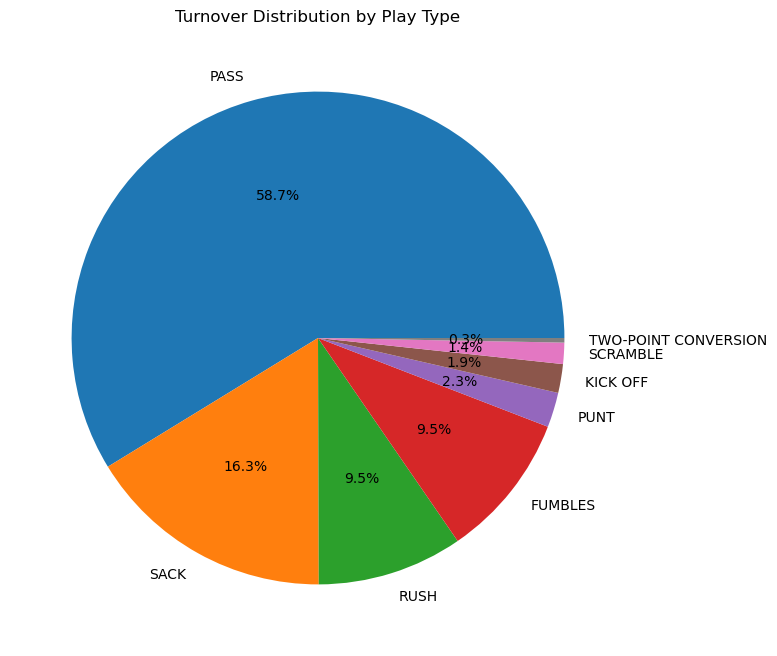

In [135]:
## Turnover Analysis

# Filter plays that are turnovers
turnovers = pbp_data[(pbp_data['is_interception'] == 1) | (pbp_data['is_fumble'] == 1)]

# Count turnovers by type
turnover_counts = turnovers['play_type'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
turnover_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Turnover Distribution by Play Type')
plt.ylabel('')  # Hide the y-label
plt.show()


In [146]:
# Team yards during the 2021 year. Not season. 
pbp_data.groupby('offense_team')[['yards', 'is_touchdown', 'is_sack']].sum().sort_values(by = "yards", ascending = False)

,yards,is_touchdown,is_sack
offense_team,,,
DAL,6638,51,31
TB,6404,55,21
LAC,6324,56,33
KC,6251,49,28
BUF,6112,54,27
BAL,6039,46,51
CIN,6023,54,52
ARI,6022,50,37
MIN,5996,45,27


In [153]:
# Most penalized team

# Filter plays where a penalty occurred
penalty_plays = pbp_data[pbp_data['is_penalty'] == 1]
# Penalties for each team on offense
offense_penalties = penalty_plays['offense_team'].value_counts()
# Penalties for each team on defense
defense_penalties = penalty_plays['defense_team'].value_counts()
# Combine counts to get total penalties for each team
total_penalties = offense_penalties.add(defense_penalties, fill_value=0)
# Create a DataFrame for the consolidated information
teams_penalties = pd.DataFrame({
    'Team': total_penalties.index,
    'Offensive Penalties': offense_penalties,
    'Defensive Penalties': defense_penalties,
    'Total Penalties': total_penalties
}).reset_index(drop=True)
# The Result
print(teams_penalties)

   Team  Offensive Penalties  Defensive Penalties  Total Penalties
0   ARI                   99                  112              211
1   ATL                  103                  109              212
2   BAL                  105                  107              212
3   BUF                  110                  118              228
4   CAR                  102                  125              227
5   CHI                  101                  116              217
6   CIN                   93                  100              193
7   CLE                   98                  121              219
8   DAL                  121                  134              255
9   DEN                  102                   88              190
10  DET                  128                   88              216
11   GB                   89                   85              174
12  HOU                  115                   89              204
13  IND                  108                   85             

In [155]:
# Average number of penalties called per NFL game 2019-2021


# Count the total number of penalties
total_penalties = pbp_data[pbp_data['is_penalty'] == 1].shape[0]
# Count the total number of unique games
total_games = pbp_data['gameId'].nunique()

# Calculate the average number of penalties per game
average_penalties_per_game = total_penalties / total_games

# Print the result
print(f"Average number of penalties per game: {average_penalties_per_game}")

Average number of penalties per game: 13.808333333333334


In [158]:
# The sucess rate of picking up a 4th and down

fourth_down_plays = pbp_data[pbp_data['down'] == 4]

# Determine success (first down or touchdown)
fourth_down_successes = fourth_down_plays[(fourth_down_plays['series_first_down'] == 1) | (fourth_down_plays['is_touchdown'] == 1)]
# Calculate success rate
success_rate = len(fourth_down_successes) / len(fourth_down_plays)
# Print the success rate
print(f"Success rate of picking up a 4th down: {success_rate:.2%}")

Success rate of picking up a 4th down: 10.09%


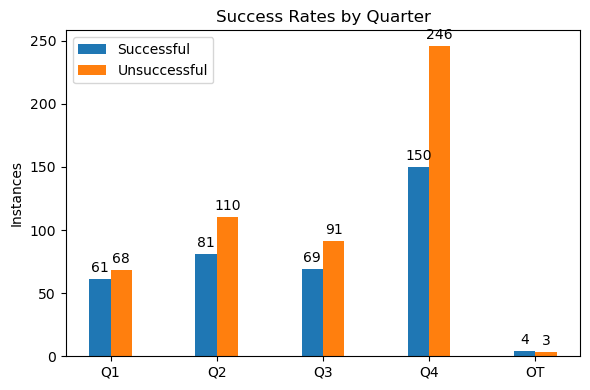

In [165]:
# Heres a bar chart showing all the successful and unsuccessful 4th down conversions by quarter.
#Teams tend to take more chance and go for it in the 2nd and 4th quarter.

labels = ['Q1', 'Q2', 'Q3', 'Q4', 'OT']
successful = [61, 81, 69, 150, 4]
unsuccessful = [68, 110, 91, 246, 3]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

# Adjust the figsize (width, height) to make the plot smaller
fig, ax = plt.subplots(figsize=(6, 4))  # Example: 6 inches by 4 inches
rects1 = ax.bar(x - width/2, successful, width, label='Successful')
rects2 = ax.bar(x + width/2, unsuccessful, width, label='Unsuccessful')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Instances')
ax.set_title('Success Rates by Quarter')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## Team specific Analytics using pbp data

In [169]:
# First lets take my team, the New Orleans Saints
# Match playtype with the team

saints_pbp = pbp_data[pbp_data['offense_team'].isin(['NO'])]

In [171]:
# Sum by playtype for the Saints

saints_counts = saints_pbp["play_type"].value_counts()
saints_counts

PASS                    471
RUSH                    392
PUNT                     81
KICK OFF                 72
SACK                     39
EXTRA POINT              34
SCRAMBLE                 32
NO PLAY                  30
FIELD GOAL               22
QB KNEEL                 11
TWO-POINT CONVERSION      5
FUMBLES                   1
Name: play_type, dtype: int64

In [187]:
# Offensive Efficiency by downs. Total yards on average gained on different downs
# Saints

efficiency_by_down = saints_pbp.groupby('down')['yards'].mean()
print("Offensive Efficiency on Different Downs:")
print(efficiency_by_down)

Offensive Efficiency on Different Downs:
down
0    0.000000
1    4.940476
2    5.167173
3    5.280193
4    0.335878
Name: yards, dtype: float64


In [189]:
# Red Zone Success Rate
# Saints

#all redzone plays
red_zone_plays = saints_pbp[(saints_pbp['yard_line'] <= 20) & (saints_pbp['yard_line'] > 0)]
red_zone_successes = red_zone_plays[red_zone_plays['is_touchdown'] == 1]
red_zone_success_rate = len(red_zone_successes) / len(red_zone_plays)
print("\nRed Zone Saints Success Rate:")
print(f"{red_zone_success_rate:.2%}")


Red Zone Saints Success Rate:
0.85%


In [221]:
tracking.columns

Index(['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId',
       'displayName', 'jerseyNumber', 'position', 'team', 'frameId', 'gameId',
       'playId', 'playDirection'],
      dtype='object')

In [229]:
# Identifiers in the team column
print(tracking['team'].unique())

['home' 'away' 'football']


In [103]:
# More saints 2021 stats using pbp
offense_list =  ['series_first_down', 'penalty_yards', 'yards', 'is_rush', 'is_pass', 'is_touchdown', 'is_incomplete', 'is_sack', 'is_challenge', 'is_challenge_reversed', 'is_measurement', 'is_fumble', 'is_penalty', 'is_penalty_accepted']
saints_offense = saints_pbp_2021[offense_list]
saints_offense.sum()

series_first_down         350
penalty_yards             716
yards                    4912
is_rush                   424
is_pass                   471
is_touchdown               43
is_incomplete             187
is_sack                    39
is_challenge                0
is_challenge_reversed       0
is_measurement              0
is_fumble                  14
is_penalty                 95
is_penalty_accepted        86
dtype: int64

In [104]:
#league average offensive metrics
league_offense = pbp_2021[offense_list]
league_offense.sum()/32
# The NO Saints were below league averages in most categories. 

series_first_down         502.12500
penalty_yards             769.68750
yards                    5518.15625
is_rush                   391.71875
is_pass                   546.71875
is_touchdown               41.68750
is_incomplete             186.50000
is_sack                    36.06250
is_challenge                3.65625
is_challenge_reversed       1.56250
is_measurement              0.00000
is_fumble                  18.15625
is_penalty                103.56250
is_penalty_accepted        91.59375
dtype: float64

In [247]:
# For fantasy Foorball

# Passing
POINTS_PASS_TD = 4
POINTS_PASS_25_YARDS = 1
POINTS_PASS_2PT_CONVERSION = 2
POINTS_PASS_INTERCEPTED = -2

# Rushing
POINTS_RUSH_TD = 6
POINTS_RUSH_10_YARDS = 1
POINTS_RUSH_2PT_CONVERSION = 2

# Receiving
POINTS_RECEIVE_TD = 6
POINTS_RECEIVE_10_YARDS = 1
POINTS_RECEIVE_2PT_CONVERSION = 2

# Misc. Offense
POINTS_KICKOFF_RETURN_TD = 6
POINTS_PUNT_RETURN_TD = 6
POINTS_FUMBLE_RECOVERED = 6
POINTS_FUMBLE_LOST = -2









In [249]:
run_plays = pbp_2021[pbp_2021['play_type'] == 'RUSH']

# Player specific Analysis

In [250]:
#  Stats on Lamar Jackson, QB
big_truss = pbp_2021[pbp_2021['description'].str.contains('L.JACKSON')]
cool_joe = pbp_2021[pbp_2021['description'].str.contains('J.BURROW')]

In [251]:
# Lamar, formation, play type, yards on play, rush, pass
for index, row in big_truss.iterrows():
    if 'L.JACKSON' in row['description']:
        print(index, row['formation'], row['play_type'],
             row['yards'], row['is_rush'], row['is_pass'])


50 SHOTGUN PASS 10 0 1
67 SHOTGUN PASS 8 0 1
79 SHOTGUN PASS 7 0 1
168 SHOTGUN SCRAMBLE 2 1 0
184 SHOTGUN PASS 1 0 1
185 SHOTGUN PASS 1 0 1
234 SHOTGUN FUMBLES 0 0 0
374 SHOTGUN RUSH -1 1 0
402 SHOTGUN RUSH -3 1 0
408 SHOTGUN SACK -4 0 0
437 SHOTGUN PASS -5 0 1
463 SHOTGUN SACK -6 0 0
740 SHOTGUN PASS 49 0 1
741 SHOTGUN PASS 49 0 1
812 SHOTGUN PASS 43 0 1
825 UNDER CENTER PASS 42 0 1
868 SHOTGUN PASS 41 0 1
904 SHOTGUN PASS 39 0 1
912 SHOTGUN PASS 39 0 1
925 SHOTGUN SCRAMBLE 39 1 0
973 SHOTGUN PASS 37 0 1
998 SHOTGUN PASS 36 0 1
1013 SHOTGUN PASS 35 0 1
1074 SHOTGUN PASS 34 0 1
1133 SHOTGUN PASS 32 0 1
1160 SHOTGUN PASS 32 0 1
1219 SHOTGUN SCRAMBLE 31 1 0
1226 SHOTGUN PASS 30 0 1
1237 SHOTGUN PASS 30 0 1
1276 SHOTGUN PASS 29 0 1
1285 SHOTGUN PASS 29 0 1
1288 SHOTGUN PASS 29 0 1
1327 SHOTGUN PASS 29 0 1
1355 SHOTGUN PASS 28 0 1
1391 SHOTGUN PASS 28 0 1
1409 SHOTGUN SCRAMBLE 28 1 0
1467 SHOTGUN PASS 27 0 1
1474 SHOTGUN PASS 27 0 1
1481 SHOTGUN PASS 27 0 1
1650 SHOTGUN PASS 25 0 1
1706 SH

In [252]:
# Lamar Jackson stats 2021
qb_list = ['yards', 'is_rush', 'is_pass', 'is_touchdown', 'is_interception', 'is_fumble', 'is_sack']
lamar = big_truss[qb_list]
lamar.sum()

yards              3676
is_rush             130
is_pass             392
is_touchdown         23
is_interception      15
is_fumble            12
is_sack              40
dtype: int64

In [124]:
# Lamar Jacksons Tendendcies 

qb_tendencies = ['pass_type', 'formation', 'play_type']
truss = big_truss[qb_tendencies]
big_truss['play_type'].value_counts()

PASS                    392
RUSH                     76
SCRAMBLE                 54
SACK                     40
TWO-POINT CONVERSION      7
QB KNEEL                  6
CLOCK STOP                4
FUMBLES                   1
Name: play_type, dtype: int64

In [125]:
# Lamar pass types

big_truss['pass_type'].value_counts()

SHORT RIGHT     108
SHORT LEFT      103
SHORT MIDDLE    102
DEEP RIGHT       33
DEEP LEFT        25
DEEP MIDDLE      21
Name: pass_type, dtype: int64

In [253]:
# The formation of lamar Jackson plays

big_truss['formation'].value_counts()

SHOTGUN              521
NO HUDDLE SHOTGUN     30
UNDER CENTER          25
NO HUDDLE              4
Name: formation, dtype: int64

In [254]:
# looking at Joe Burrows formation numbers
cool_joe['formation'].value_counts()

SHOTGUN              461
UNDER CENTER          97
NO HUDDLE SHOTGUN     32
NO HUDDLE              5
Name: formation, dtype: int64

In [255]:
big_truss['pass_type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

SHORT RIGHT     27.55%
SHORT LEFT      26.28%
SHORT MIDDLE    26.02%
DEEP RIGHT       8.42%
DEEP LEFT        6.38%
DEEP MIDDLE      5.36%
Name: pass_type, dtype: object

In [256]:
cool_joe['pass_type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

SHORT RIGHT       31.06%
SHORT LEFT        27.66%
SHORT MIDDLE      22.65%
DEEP RIGHT        10.02%
DEEP LEFT          5.21%
DEEP MIDDLE        3.21%
RIGHT. PENALTY      0.2%
Name: pass_type, dtype: object

# THE END